## This is the Sentiment Analysis for Amazon Reviews of the products listed on Amazon. The reviews are entered by actual customers. The review has attributes like stars, the actual text entered, we are generating Sentiment Polarity Score basis the data.

In [4]:
#### Loading all the required libraries here
from lxml import html  
import requests
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

amazon_url = 'https://www.amazon.co.uk/Hive-Heating-Thermostat-Professional-Installation/product-reviews/B011B3J6KY/ref=cm_cr_othr_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber='
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'

headers = {'User-Agent': user_agent}
page = requests.get(amazon_url, headers = headers)
parser = html.fromstring(page.content)

In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import utilities
import scikitplot as skplt
import nltk

/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


#### Download all the stopwords package here

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
xpath_reviews = '//div[@data-hook="review"]'
reviews = parser.xpath(xpath_reviews)

In [12]:
xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
xpath_title   = './/a[@data-hook="review-title"]//text()'
xpath_author  = './/a[@data-hook="review-author"]//text()'
xpath_date    = './/span[@data-hook="review-date"]//text()'
xpath_body    = './/span[@data-hook="review-body"]//text()'
xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'

In [13]:
# Create a dataframe here. 

reviews_df = pd.DataFrame()
for review in reviews:
    rating  = review.xpath(xpath_rating)
    title   = review.xpath(xpath_title)
    author  = review.xpath(xpath_author)
    date    = review.xpath(xpath_date)
    body    = review.xpath(xpath_body)
    helpful = review.xpath(xpath_helpful)

    review_dict = {'rating': rating,
                   'title': title,
                   'author': author,             
                   'date': date,
                   'body': body,
                   'helpful': helpful}
    reviews_df = reviews_df.append(review_dict, ignore_index=True)

In [14]:
all_reviews = pd.DataFrame()

In [15]:
# Fill the values of the reviews here. . 

for i in range(1,90):
    amazon_url = 'https://www.amazon.co.uk/Hive-Heating-Thermostat-Professional-Installation/product-reviews/B011B3J6KY/ref=cm_cr_othr_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    headers = {'User-Agent': user_agent}
    page = requests.get(amazon_url, headers = headers)
    parser = html.fromstring(page.content)
    xpath_reviews = '//div[@data-hook="review"]'
    reviews = parser.xpath(xpath_reviews)
    reviews_df = pd.DataFrame()
    xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
    xpath_title   = './/a[@data-hook="review-title"]//text()'
    xpath_author  = './/a[@data-hook="review-author"]//text()'
    xpath_date    = './/span[@data-hook="review-date"]//text()'
    xpath_body    = './/span[@data-hook="review-body"]//text()'
    xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'
    #print(i)
    for review in reviews:
        rating  = review.xpath(xpath_rating)
        title   = review.xpath(xpath_title)
        author  = review.xpath(xpath_author)
        date    = review.xpath(xpath_date)
        body    = review.xpath(xpath_body)
        helpful = review.xpath(xpath_helpful)

        review_dict = {'rating': rating,
                       'title': title,
                       'author': author,             
                       'date': date,
                       'body': body,
                       'helpful': helpful}
        reviews_df = reviews_df.append(review_dict, ignore_index=True)
    #print(reviews_df)
    all_reviews = all_reviews.append(reviews_df)
    


In [16]:
all_reviews.head()

,author,body,date,helpful,rating,title
0,[Rob A.],"[Great product, replaced a very old 80's slide...",[on 16 January 2018],[115 people found this helpful],[5.0 out of 5 stars],"[Really useful, and sort of cool!]"
1,[S. Newton],"[I have a combi boiler, no water tank., The co...",[on 26 December 2017],[3 people found this helpful],[4.0 out of 5 stars],[Works fine with Alexa. Dubious about claimed ...
2,[JC],"[Bough together Multizone and Hive, phoned up ...",[on 15 July 2017],[3 people found this helpful],[5.0 out of 5 stars],[Have been perfectly happy with the installation]
3,[Fionn],"[Delighted with our Hive setup, we bought it w...",[on 6 February 2017],[One person found this helpful],[5.0 out of 5 stars],[Slick Simple Functionality]
4,[Nemesis],[I had previously purchased a Drayton Wiser co...,[on 5 March 2018],[],[5.0 out of 5 stars],"[Simple, elegant and just works.]"


#### Define a path here

In [22]:
out_folder = '/Users/vaibhav.verdhan/Documents/Sentiment Analysis/'

#### Save the reviews locally

In [23]:
all_reviews.to_csv(out_folder + 'Reviews.csv')

#### Load the data and start the analysis

In [168]:
#Load the data now and analyse it
data_path = '/users/vaibhav.verdhan/Documents/Sentiment Analysis/'
reviewDataCSV = 'Reviews.csv'
reviewData = (pd.read_csv(data_path+reviewDataCSV,index_col=0,))

In [169]:
reviewData.shape

(890, 6)

In [107]:
reviewData.rating.unique()

array(["['5.0 out of 5 stars']", "['4.0 out of 5 stars']",
       "['1.0 out of 5 stars']", "['2.0 out of 5 stars']",
       "['3.0 out of 5 stars']"], dtype=object)

In [108]:
reviewData.rating.value_counts()

['5.0 out of 5 stars']    559
['1.0 out of 5 stars']    157
['4.0 out of 5 stars']     91
['3.0 out of 5 stars']     50
['2.0 out of 5 stars']     33
Name: rating, dtype: int64

In [170]:
reviewData.rating.value_counts()[1]

157

In [30]:
reviewData.rating.unique()[0]

"['5.0 out of 5 stars']"

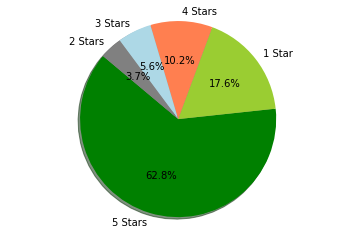

In [171]:

labels = '5 Stars', '1 Star', '4 Stars', '3 Stars', '2 Stars'
sizes = [reviewData.rating.value_counts()[0], reviewData.rating.value_counts()[1],reviewData.rating.value_counts()[2],reviewData.rating.value_counts()[3],reviewData.rating.value_counts()[4]]
colors = ['green', 'yellowgreen', 'coral', 'lightblue', 'grey']
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [32]:
reviewData.body.head()

0    ["Great product, replaced a very old 80's slid...
1    ['I have a combi boiler, no water tank.', 'The...
2    ["Bough together Multizone and Hive, phoned up...
3    ['Delighted with our Hive setup, we bought it ...
4    ['I had previously purchased a Drayton Wiser c...
Name: body, dtype: object

In [33]:
# the latest review
max(reviewData.date)

"['on 9 September 2017']"

In [34]:
# the oldest review
min(reviewData.date)

"['on 1 April 2018']"

## The Text Analytics Starts

##### Calculate the number of words in each review

In [35]:
reviewsBodyWordCount = reviewData.body.apply(lambda x: len(str(x).split(" ")))

In [36]:
reviewsBodyWordCount.sort_values(ascending= False)

5    995
7    969
0    913
9    833
4    779
4    752
1    697
5    676
2    655
1    621
8    620
7    603
5    575
2    571
8    571
2    552
9    528
8    525
2    515
8    498
6    495
0    491
3    491
7    474
7    472
3    443
4    418
7    410
6    386
8    378
    ... 
2      2
5      2
7      2
2      2
3      2
7      2
3      2
1      2
2      2
4      2
2      1
7      1
8      1
1      1
5      1
8      1
7      1
8      1
8      1
1      1
0      1
5      1
4      1
8      1
2      1
8      1
7      1
6      1
9      1
3      1
Name: body, Length: 890, dtype: int64

In [37]:
reviewsBodyWordCount.nlargest(n=5, keep='first')

5    995
7    969
0    913
9    833
4    779
Name: body, dtype: int64

In [38]:
reviewsBodyWordCount.nsmallest(n=5, keep='first')

4    1
8    1
0    1
1    1
8    1
Name: body, dtype: int64

##### Calculate the number of characters in each review

In [39]:
reviewsBodyCharCount = reviewData.body.str.len() ## this also includes spaces

In [40]:
reviewsBodyCharCount.nlargest(n=5, keep='first')

5    5635
7    5228
0    4596
9    4393
4    4186
Name: body, dtype: int64

In [41]:
reviewsBodyCharCount.nsmallest(n=5, keep='first')

8    6
3    6
8    7
0    8
1    8
Name: body, dtype: int64

## Pre-processing starts

#### Convert all the words to lower case

In [172]:
type(reviewData.body.str)

pandas.core.strings.StringMethods

In [43]:
reviewData.head()

,author,body,date,helpful,rating,title
0,['Rob A.'],"[""Great product, replaced a very old 80's slid...",['on 16 January 2018'],['115 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']"
1,['S. Newton'],"['I have a combi boiler, no water tank.', 'The...",['on 26 December 2017'],['3 people found this helpful'],['4.0 out of 5 stars'],['Works fine with Alexa. Dubious about claimed...
2,['JC'],"[""Bough together Multizone and Hive, phoned up...",['on 15 July 2017'],['3 people found this helpful'],['5.0 out of 5 stars'],['Have been perfectly happy with the installat...
3,['Fionn'],"['Delighted with our Hive setup, we bought it ...",['on 6 February 2017'],['One person found this helpful'],['5.0 out of 5 stars'],['Slick Simple Functionality']
4,['Nemesis'],['I had previously purchased a Drayton Wiser c...,['on 5 March 2018'],[],['5.0 out of 5 stars'],"['Simple, elegant and just works.']"


In [173]:
reviewData.body = reviewData.body.str.lower()

In [174]:
# all the body reviews are converted to lowercase
reviewData.head()

,author,body,date,helpful,rating,title
0,['Rob A.'],"[""great product, replaced a very old 80's slid...",['on 16 January 2018'],['115 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']"
1,['S. Newton'],"['i have a combi boiler, no water tank.', 'the...",['on 26 December 2017'],['3 people found this helpful'],['4.0 out of 5 stars'],['Works fine with Alexa. Dubious about claimed...
2,['JC'],"[""bough together multizone and hive, phoned up...",['on 15 July 2017'],['3 people found this helpful'],['5.0 out of 5 stars'],['Have been perfectly happy with the installat...
3,['Fionn'],"['delighted with our hive setup, we bought it ...",['on 6 February 2017'],['One person found this helpful'],['5.0 out of 5 stars'],['Slick Simple Functionality']
4,['Nemesis'],['i had previously purchased a drayton wiser c...,['on 5 March 2018'],[],['5.0 out of 5 stars'],"['Simple, elegant and just works.']"


#### Remove the punctuations

In [175]:
reviewData.body = reviewData.body.str.replace('[^\w\s]','')

#### Remove the Stop Words, which are the commonly occuring words like the, a, an, is etc.

In [176]:
stop = stopwords.words('english')

In [177]:
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [178]:
reviewData.body.head()

0    great product replaced old 80s slide timer clo...
1    combi boiler water tank control unit arrived w...
2    bough together multizone hive phoned british g...
3    delighted hive setup bought without installati...
4    previously purchased drayton wiser control wir...
Name: body, dtype: object

##### These are the most comonly occuring words in our corpus. Depending on the requirement, we may remove or keep them. We are removing them here

In [179]:
freq = pd.Series(' '.join(reviewData.body).split()).value_counts()[:20]

In [182]:
freq

['hive',
 'heating',
 'thermostat',
 'gas',
 'installation',
 'british',
 'easy',
 'install',
 'boiler',
 'system',
 'use',
 'app',
 'product',
 'would',
 'get',
 'great',
 'home',
 'control',
 'one',
 'engineer']

In [181]:
freq = list(freq.index)
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [183]:
reviewData.body.head()

0    replaced old 80s slide timer clock gravity fed...
1    combi water tank unit arrived within couple da...
2    bough together multizone phoned came installed...
3    delighted setup bought without ireland also bo...
4    previously purchased drayton wiser wireless tr...
Name: body, dtype: object

##### Lets see which are the rare words, we are removing them

In [184]:
freq = pd.Series(' '.join(reviewData.body).split()).value_counts()[-10:]

In [185]:
freq

trainout        1
setups          1
unacceptable    1
1000            1
30cm            1
direction       1
assured         1
pu              1
rebooked        1
functioned      1
dtype: int64

In [186]:
freq = list(freq.index)
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Tokentization of reviews

In [187]:
from nltk.tokenize import word_tokenize

In [188]:
tokens = word_tokenize(reviewData.iloc[1,1])
print(tokens)

['combi', 'water', 'tank', 'unit', 'arrived', 'within', 'couple', 'days', 'scratch', 'card', 'code', 'arrange', 'fit', 'inside', 'packaging', 'fitted', 'ten', 'days', 'later', 'took', 'hour', 'runs', '4', 'aa', 'batteries', 'supplied', 'site', 'wherever', 'want', 'long', 'effective', 'communication', 'range', 'unitrouter', 'works', 'fine', 'alexa', 'alexa', 'set', 'temperature', '20', 'create', 'time', 'onoff', 'temperature', 'settings', 'easily', 'sure', 'save', 'huge', 'amount', 'money', 'compared', 'standard', 'timed', 'may', 'worth', 'considering', 'like', 'old', 'coming', 'end', 'useful', 'life']


In [189]:
reviewData.iloc[1,1]

'combi water tank unit arrived within couple days scratch card code arrange fit inside packaging fitted ten days later took hour runs 4 aa batteries supplied site wherever want long effective communication range unitrouter works fine alexa alexa set temperature 20 create time onoff temperature settings easily sure save huge amount money compared standard timed may worth considering like old coming end useful life'

#### Doing Stemming, currenlty commented since we are preferring Lemit

In [239]:
#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#reviewData.body[:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    replac old 80 slide timer clock graviti fed st...
1    purchas model opt self bit research onlin manu...
2    purchas although reason savvi electr peer time...
3    instal black fridaycyb monday offer kit ship e...
4    love bought new combi realli best thing ive ev...
Name: body, dtype: object

#### Doing Lemmatization

In [190]:
from textblob import Word
reviewData.body = reviewData.body.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviewData.body.head()

0    replaced old 80 slide timer clock gravity fed ...
1    combi water tank unit arrived within couple da...
2    bough together multizone phoned came installed...
3    delighted setup bought without ireland also bo...
4    previously purchased drayton wiser wireless tr...
Name: body, dtype: object

#### Word Cloud function is defined overe here

In [191]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} 
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [192]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [193]:
sentimentString = reviewData.iloc[1,1]

In [194]:
# append to this string 
for i in range(2,len(reviewData)):
    sentimentString = sentimentString + reviewData.iloc[i,1]

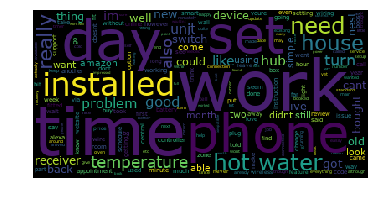

In [195]:
generate_wordcloud(sentimentString)

#### This is the Sentiment Analysis 

In [196]:
# the functions generates polarity and subjectivity here, subsetting the polarity only here
allReviewsSentiment = reviewData.body[:900].apply(lambda x: TextBlob(x).sentiment[0])

In [197]:
# this contains boths subjectivity and polarity
allReviewsSentimentComplete = reviewData.body[:900].apply(lambda x: TextBlob(x).sentiment)

In [198]:
allReviewsSentimentComplete.head()

0    (0.34791666666666665, 0.4791666666666667)
1     (0.2472222222222222, 0.3490740740740741)
2    (0.26666666666666666, 0.7333333333333334)
3     (0.2357707509881423, 0.5741357676140284)
4    (0.06448412698412699, 0.4106009070294785)
Name: body, dtype: object

In [199]:
allReviewsSentiment.to_csv(out_folder + 'ReviewsSentiment.csv')

In [ ]:
## get the respective counts for all the reviews
# if the polarity is above 0.75 Very Satisfied
# if the polarity is between 0.5-0.74 Satisfied
# if the polarity is between 0.2-0.5 Nice
# if the polarity is between -0.2 to 0.2 Neutral
# if the polarity is between -0.2 to -0.5 Dissatisfied
# if the polarity is between -0.5 to -0.74 Very Dissatisfied
# if the polarity is less than -0.75 Extremely Dissatisfied


In [200]:
allReviewsSentimentDF = allReviewsSentiment.to_frame()

In [201]:
allReviewsSentimentDF.head()

,body
0,0.347917
1,0.247222
2,0.266667
3,0.235771
4,0.064484


In [202]:
# Create a list to store the data
grades = []

# For each row in the column,
for row in allReviewsSentimentDF['body']:
    # if more than a value,
    if row >= 0.75:
       grades.append('Extremely Satisfied')
    elif (row >= 0.5) & (row < 0.75):
        grades.append('Satisfied')
    elif (row >= 0.2) & (row < 0.5):
        grades.append('Nice')
    elif (row >= -0.2) & (row < 0.2):
        grades.append('Neutral')
    elif (row > -0.5) & (row <= -0.2):
        grades.append('Bad')
    elif (row >= -0.75) & (row < -0.5):
        grades.append('Dis-satisfied')
    elif  row < -0.75:
        grades.append('Extremely Dis-satisfied')
    else:
        # Append a failing grade
        grades.append('No Sentiment')
        
# Create a column from the list
allReviewsSentimentDF['SentimentScore'] = grades

In [203]:
allReviewsSentimentDF.head()

,body,SentimentScore
0,0.347917,Nice
1,0.247222,Nice
2,0.266667,Nice
3,0.235771,Nice
4,0.064484,Neutral


In [204]:
allReviewsSentimentDF.SentimentScore.value_counts()

Neutral                417
Nice                   286
Satisfied              103
Extremely Satisfied     54
Bad                     16
No Sentiment             9
Dis-satisfied            5
Name: SentimentScore, dtype: int64

In [205]:
type(allReviewsSentimentDF.SentimentScore)

pandas.core.series.Series

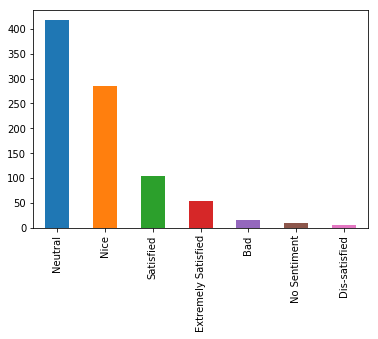

In [206]:
allReviewsSentimentDF['SentimentScore'].value_counts().plot(kind='bar')

In [207]:
reviewData.head()

,author,body,date,helpful,rating,title
0,['Rob A.'],replaced old 80 slide timer clock gravity fed ...,['on 16 January 2018'],['115 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']"
1,['S. Newton'],combi water tank unit arrived within couple da...,['on 26 December 2017'],['3 people found this helpful'],['4.0 out of 5 stars'],['Works fine with Alexa. Dubious about claimed...
2,['JC'],bough together multizone phoned came installed...,['on 15 July 2017'],['3 people found this helpful'],['5.0 out of 5 stars'],['Have been perfectly happy with the installat...
3,['Fionn'],delighted setup bought without ireland also bo...,['on 6 February 2017'],['One person found this helpful'],['5.0 out of 5 stars'],['Slick Simple Functionality']
4,['Nemesis'],previously purchased drayton wiser wireless tr...,['on 5 March 2018'],[],['5.0 out of 5 stars'],"['Simple, elegant and just works.']"


In [208]:
len(reviewData)

890

In [209]:
#### Merge the review data with Sentiment generated

# add column Polarity Score
reviewData['polarityScore'] = allReviewsSentimentDF['body']



In [210]:
reviewData.head()

,author,body,date,helpful,rating,title,polarityScore
0,['Rob A.'],replaced old 80 slide timer clock gravity fed ...,['on 16 January 2018'],['115 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']",0.347917
1,['S. Newton'],combi water tank unit arrived within couple da...,['on 26 December 2017'],['3 people found this helpful'],['4.0 out of 5 stars'],['Works fine with Alexa. Dubious about claimed...,0.247222
2,['JC'],bough together multizone phoned came installed...,['on 15 July 2017'],['3 people found this helpful'],['5.0 out of 5 stars'],['Have been perfectly happy with the installat...,0.266667
3,['Fionn'],delighted setup bought without ireland also bo...,['on 6 February 2017'],['One person found this helpful'],['5.0 out of 5 stars'],['Slick Simple Functionality'],0.235771
4,['Nemesis'],previously purchased drayton wiser wireless tr...,['on 5 March 2018'],[],['5.0 out of 5 stars'],"['Simple, elegant and just works.']",0.064484


#### Generate the word-cloud for sentiments with bad reviews

In [211]:
negativeReviews = reviewData[reviewData.polarityScore < 0]

In [212]:
negativeReviews.head()

,author,body,date,helpful,rating,title,polarityScore
9,['JSS'],bought sale july knowing itd much easier insta...,['on 23 July 2017'],['2 people found this helpful'],['5.0 out of 5 stars'],['Easy and quick install - great product'],-0.091667
0,['Amazon Customer'],came already scratched code called book appoin...,['on 28 December 2017'],['4 people found this helpful'],['1.0 out of 5 stars'],['Very disappointed. Have to wait for months f...,-0.750000
0,['Wayne68'],work well installed year cut usage two third w...,['on 13 January 2018'],['One person found this helpful'],['5.0 out of 5 stars'],['Love Hive.'],-0.009524
1,['BeckyS'],sitting uselessly side since november bought i...,['on 19 December 2017'],['3 people found this helpful'],['1.0 out of 5 stars'],['No one is available to install i..'],-0.050000
2,['Amazon Customer'],ordered turn 2 week appointment provided commu...,['on 28 February 2018'],['2 people found this helpful'],['1.0 out of 5 stars'],['Engineer did not attend appointment'],-0.600000


In [213]:
negativeString = negativeReviews.iloc[1,1]

In [214]:
# append to this string 
for i in range(2,len(reviewData)):
    negativeString = negativeString + reviewData.iloc[i,1]

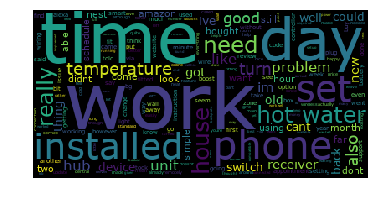

In [215]:
generate_wordcloud(negativeString)